This post is the second post in a series of posts on how to plot stress strain curves with Python and Matplotlib. In the [previous post in the series]({filename}/posts/matplotlib/stress_strain_curve_with_python_and_matplotlib.md) we built a stress strain curve from the data in two .xls data files. The plot built in the previous post included two lines, axes labels, a title and legend. The data in the plot came from two .xls excel files and was from a tensile test of two metal samples.

The code below builds the plot in the previous post.

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


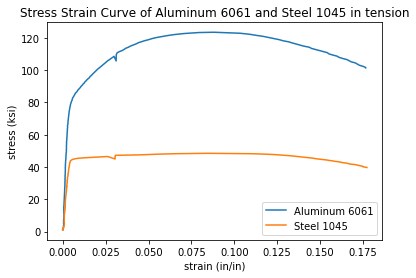

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

steel_df = pd.read_excel("aluminum6061.xls")
al_df = pd.read_excel("steel1045.xls")

strain_al = al_df['CH5']*0.01
d_al = 0.506
stress_al = (al_df['FORCE']*0.001)/(np.pi*((d_al/2)**2))
strain_steel = steel_df['CH5']*0.01
d_steel = 0.506
stress_steel = (steel_df['FORCE']*0.001)/(np.pi*((d_steel/2)**2))

plt.plot(strain_al,stress_al,strain_steel,stress_steel)
plt.xlabel('strain (in/in)')
plt.ylabel('stress (ksi)')
plt.title('Stress Strain Curve of Aluminum 6061 and Steel 1045 in tension')
plt.legend(['Aluminum 6061','Steel 1045'])
plt.show()

In this post, we are going to add an inset curve to the plot that shows the linear elastic region. An inset curve is a small plot that is placed within a plot that shows a zoomed-in view of the larger plot. On a stress-strain cuve, an inset curve is used to zoom-in on the linear elastic region on the plot. 

To build our inset curve, we will use Python and Matplotlib's object-oriented interface. The plot above, from the previous post, was constructed using the pyplot interface. For a simple plot, the pyplot interface above is sufficient. 

But our plot with an inset curve is more complicated than the plot above. Matplotlib's object-oriented interface allows us to access individual components of the plot, like axes, and set specific attributes on these components. This added versitility means we can include an inset curve within another plot.

To build the plot with an inset curve, first we need to import a couple modules: NumPy, Pandas, and Matplotlib. These three modules have common import aliases ```np```, ```pd```, and ```plt```. The line ```%matplotlib inline``` is a Jupyter notebook magic command that will show plots directly in a Jupyter notebook. If you are coding your inset curve in a .py file, leave ```%matplotlib inline``` out, as it is not valid Python code.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Next we need to bring in the data from two external files into variables in our script. The two external files that contain the data we are going to plot are linked below:

[aluminum6061.xls](https://github.com/ProfessorKazarinoff/staticsite/raw/master/content/code/matplotlib_plots/stress_strain_curves/aluminum6061.xls)

[steel1045.xls](https://github.com/ProfessorKazarinoff/staticsite/raw/master/content/code/matplotlib_plots/stress_strain_curves/steel1045.xls)

If you are following along and building an inset curve yourself, make sure to download the .xls data files and place these data files in the same directory as you Jupyter notebook or Python script.

A conveniant Jupyter notebook magic command, ```%ls```, lists the contents of the current directory (the directory where the notebook is saved). Make sure you can see the two .xls data files in this directory.

In [3]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 1236-A93E

 Directory of C:\Users\peter.kazarinoff\Documents\staticsite\content\code\matplotlib_plots\stress_strain_curves

03/21/2021  06:54 PM    <DIR>          .
03/21/2021  06:54 PM    <DIR>          ..
03/21/2021  06:54 PM    <DIR>          .ipynb_checkpoints
12/28/2020  01:47 PM            36,864 aluminum6061.xls
12/28/2020  01:47 PM    <DIR>          images
12/28/2020  01:47 PM            38,912 steel1045.xls
12/28/2020  01:47 PM            44,972 stress_strain_curve_with_inset.png
12/28/2020  01:47 PM           148,175 stress_strain_curve_with_inset_elastic_region.ipynb
12/28/2020  01:47 PM            88,263 stress_strain_curve_with_python.ipynb
12/28/2020  01:47 PM           113,352 stress-strain_curve.png
               6 File(s)        470,538 bytes
               4 Dir(s)  36,953,825,280 bytes free


We can see the two data files ```aluminum6061.xls``` and ```steel1045.xls``` in the same folder as our Jupyter notebook ```stress_strain_curve_with_inset_elastic_region.ipynb```

Next, we will read in the two .xls data files using Pandas ```pd.read_excel()``` function. The result is two Pandas dataframes ```steel_df``` and ```al_df```. 

In [4]:
steel_df = pd.read_excel("aluminum6061.xls")
al_df = pd.read_excel("steel1045.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


We can use Pandas ```df.head()``` method to view the first five rows of each dataframe.

In [5]:
steel_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN


In [6]:
al_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN


We see a couple of columns in each dataframe. The columns we are interest in are below:
    
 * **FORCE** Force measurements from the load cell in pounds (lb)
 * **EXT** Extension measurements from the mechanical extensometer in percent (%), strain in percent
 * **CH5** Extension readings from the laser extensometer in percent (%), strain in percent

We will use these columns from the dataframes in the following ways

 * **FORCE** will be converted to stress using the cross-sectional area of our test samples
 
 $$ \sigma = \frac{F}{A_0} $$
 
 * **EXT** (mechanical exstensometer readings) will be converted into strain on our inset cuve
 
 $$ \epsilon_{unitless} = \epsilon_{\%} \times 0.01 $$
 
 * **CH5** (laser extensometer readings) will be converted into strain on the overall, large stress strain curve
 
 $$ \epsilon_{unitless} = \epsilon_{\%} \times 0.01 $$

In [7]:
strain_al_plastic = al_df['CH5']*0.01
strain_al_elastic = al_df['EXT']*0.01
d_al = 0.506
stress_al = (al_df['FORCE']*0.001)/(np.pi*((d_al/2)**2))

strain_steel_plastic = steel_df['CH5']*0.01
strain_steel_elastic = steel_df['EXT']*0.01
d_steel = 0.506
stress_steel = (steel_df['FORCE']*0.001)/(np.pi*((d_steel/2)**2))

Now that we have the data in 6 pandas series, we can build a simple plot. We'll use Matplotlib's object-oriented interface to create to objects, a figure object called ```fig``` and an axes object ```ax1```. Then we can run the ```.plot()``` method on our ```ax1``` object and pass in two sets of series. The command ```plt.show()``` shows the plot.

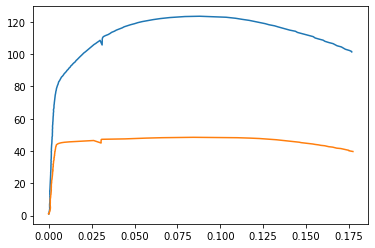

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(strain_al_plastic,stress_al,strain_steel_plastic,stress_steel)
plt.show()

We see a plot that contains two lines.

Next let's use Matplotlib's object-oriented interface to add axis labels and titles. Below is a chart that relates how to use Matplotlib's ```plt``` approach, compared to the object-oriented approach that we'll use.

| plot component | ```plt``` approach | object-oriented approach |
| --- | --- | --- |
| x-axis label | ```plt.xlabel('strain')``` | ```ax.set_xlabel('strain')``` |
| y-axis label | ```plt.ylabel('stress``` | ```ax.set_xyabel('stress')``` |
| title | ```plt.title('stress strain curve')``` | ```ax.set_title('stress strain curve')``` |
| legend | ```plt.legend(['Al6061','Steel1045])``` | ```ax.legend(['Al6061','Steel1045])``` |

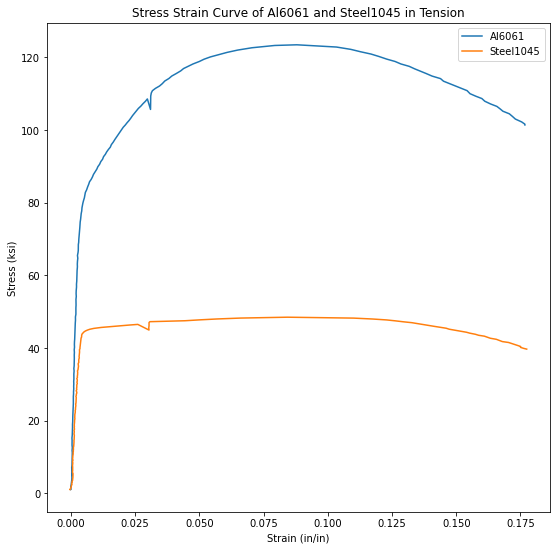

In [9]:
fig, ax1 = plt.subplots()
fig.set_size_inches([9,9])
ax1.plot(strain_al_plastic,stress_al,strain_steel_plastic,stress_steel)
ax1.legend(['Al6061','Steel1045'])
ax1.set_xlabel('Strain (in/in)')
ax1.set_ylabel('Stress (ksi)')
ax1.set_title('Stress Strain Curve of Al6061 and Steel1045 in Tension')

plt.show()

Next, let's  add the inset curve. Our inset curve is a zoomed-in view of the linear elastic region. We'll use Matplotlib's ```ax.add_axes([ ])``` method. This method outputs a new axis object ```ax2```. ```ax2``` will be the axes that we plot the inset curve on. We can set attributes like ```.set_xlabel()``` on our ```ax2``` object to add labels to the axis, add a title, and limit the x and y axis.

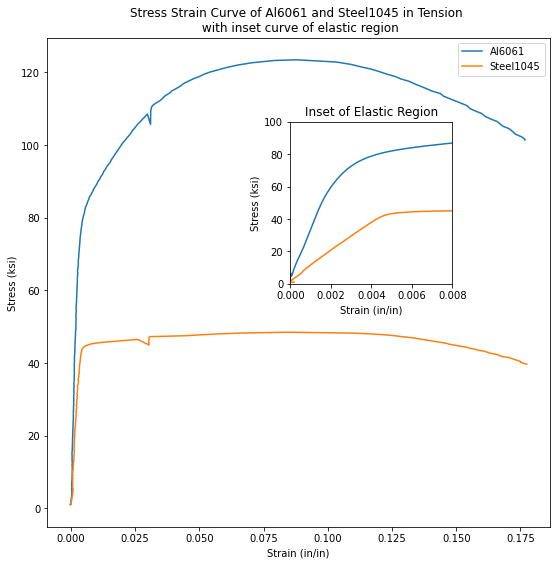

In [10]:
fig, ax1 = plt.subplots()
fig.set_size_inches([9,9])

ax1.plot(strain_al_plastic,stress_al,strain_steel_plastic,stress_steel)
ax1.legend(['Al6061','Steel1045'])
ax1.set_xlabel('Strain (in/in)')
ax1.set_ylabel('Stress (ksi)')
ax1.set_title('Stress Strain Curve of Al6061 and Steel1045 in Tension \n with inset curve of elastic region')

left, bottom, width, height = [0.5, 0.5, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(strain_al_elastic,stress_al,strain_steel_elastic, stress_steel)
ax2.set_xlabel('Strain (in/in)')
ax2.set_ylabel('Stress (ksi)')
ax2.set_title('Inset of Elastic Region')
ax2.set_xlim([0,0.008])
ax2.set_ylim([0,100])

fig.savefig('stress_strain_curve_with_inset.png')

plt.show()

We see a plot that contains an inset curve. The inset curve has two lines, just like the large plot. The inset curve has axis labels and a title. The same colors in the main plot is used in the inset plot. 

## Summary

In this post, we plotted a stress strain curve with Python and Matplotlib. We used Matplotlib's object oriented interface to build the inset curve. Our inset curve was added on top of our main plot.